# DLC Postprocess Library

Run after training has been performed, and at least 1 video has been analyzed

In [1]:
import os

from IPython.display import display, HTML

# Append base directory
import os,sys,inspect
thispath = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parpath = os.path.dirname(thispath)
sys.path.append(parpath)
print("Appended script directory", parpath)

%load_ext autoreload
%autoreload 2

from lib.qt_wrapper import gui_fname, gui_fnames, gui_fpath
from lib.parse_dlc_results import dlc_csv_composite_crawl, dlc_fix_old_h5
# from lib.plots import plotStatistics
from lib.plots_multitrial import SessionPostprocess

Appended script directory /media/aleksejs/DataHDD/work/codes/comp-neuro/analysis-tracking/dlc-scripts/scripts


/opt/anaconda3/envs/py36qt5/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Merge trial-based DLC results into session-based

1. Provide root directory for videos and tracking
2. Provide output folder
3. Merged files will be written into output folder (with no further subfolder structure)
  * Name of an output file will be the folder name the trials are contained in
  * Code will throw an exception (crash) if
    - number of videos and tracking files does not match
    - framerate changes during the session
    - tracked nodes do not have exact same names during the session

In [2]:
root_crawl_path = gui_fpath("Select path for crawler", "./")
output_path = gui_fpath("Select output path", root_crawl_path)

In [ ]:
dlc_csv_composite_crawl(root_crawl_path, output_path, extrakeys=[])

# Old Version of dlc-scripts only: Remove useless directories

In [6]:
fnames_h5 = gui_fnames("h5", "./", "HDF5 (*.h5)")
dlc_fix_old_h5(fnames_h5)

0 / 221- already converted, skip
1 / 221- already converted, skip
2 / 221- already converted, skip
3 / 221- already converted, skip
4 / 221- already converted, skip
5 / 221- already converted, skip
6 / 221- already converted, skip
7 / 221- already converted, skip
8 / 221- already converted, skip
9 / 221- already converted, skip
10 / 221- already converted, skip
11 / 221- already converted, skip
12 / 221- already converted, skip
13 / 221- already converted, skip
14 / 221- already converted, skip
15 / 221- already converted, skip
16 / 221- already converted, skip
17 / 221- already converted, skip
18 / 221- already converted, skip
19 / 221- already converted, skip
20 / 221- already converted, skip
21 / 221- already converted, skip
22 / 221- already converted, skip
23 / 221- already converted, skip
24 / 221- already converted, skip
25 / 221- already converted, skip
26 / 221- already converted, skip
27 / 221- already converted, skip
28 / 221- already converted, skip
29 / 221- already conver

# Analyse a session-based DLC results file

In [2]:
fnameH5 = gui_fname("Open DLC session results file", "./", "HDF5 files (*.h5)")
fpathVideo = gui_fpath("Open video containing folder", fnameH5)
fnameTemplate = gui_fname("Select Postprocess Template Filename...", "./", "Template Files (*.json)")
fpathResult = gui_fpath("Select result path", "./")

In [4]:
SP = SessionPostprocess(fnameH5, fnameTemplate, fpathVideo, fpathResult)

### Some basic data about the data set

Original path /media/hpc_user/MyBook10/whisk_data/mvg_4/mvg_4_2017_11_20_a


,yaro_dlc_results
Framerate,40.0
Maximal number of time steps,397.0
Number of tracked nodes,9.0
Number of trials,682.0


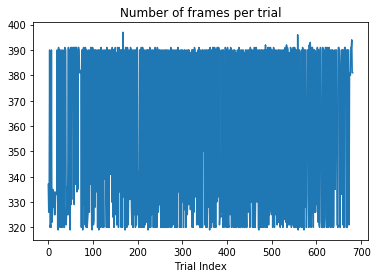

In [5]:
SP.display_trial_properties()

### Quality control

Plots p-values of each coordinate as projections over time, trial and channel

**TODO**:
<font color='red' size='3'>
 <ul>
  <li>Integrate velocity and edge length criteria</li>
</ul> 
</font>

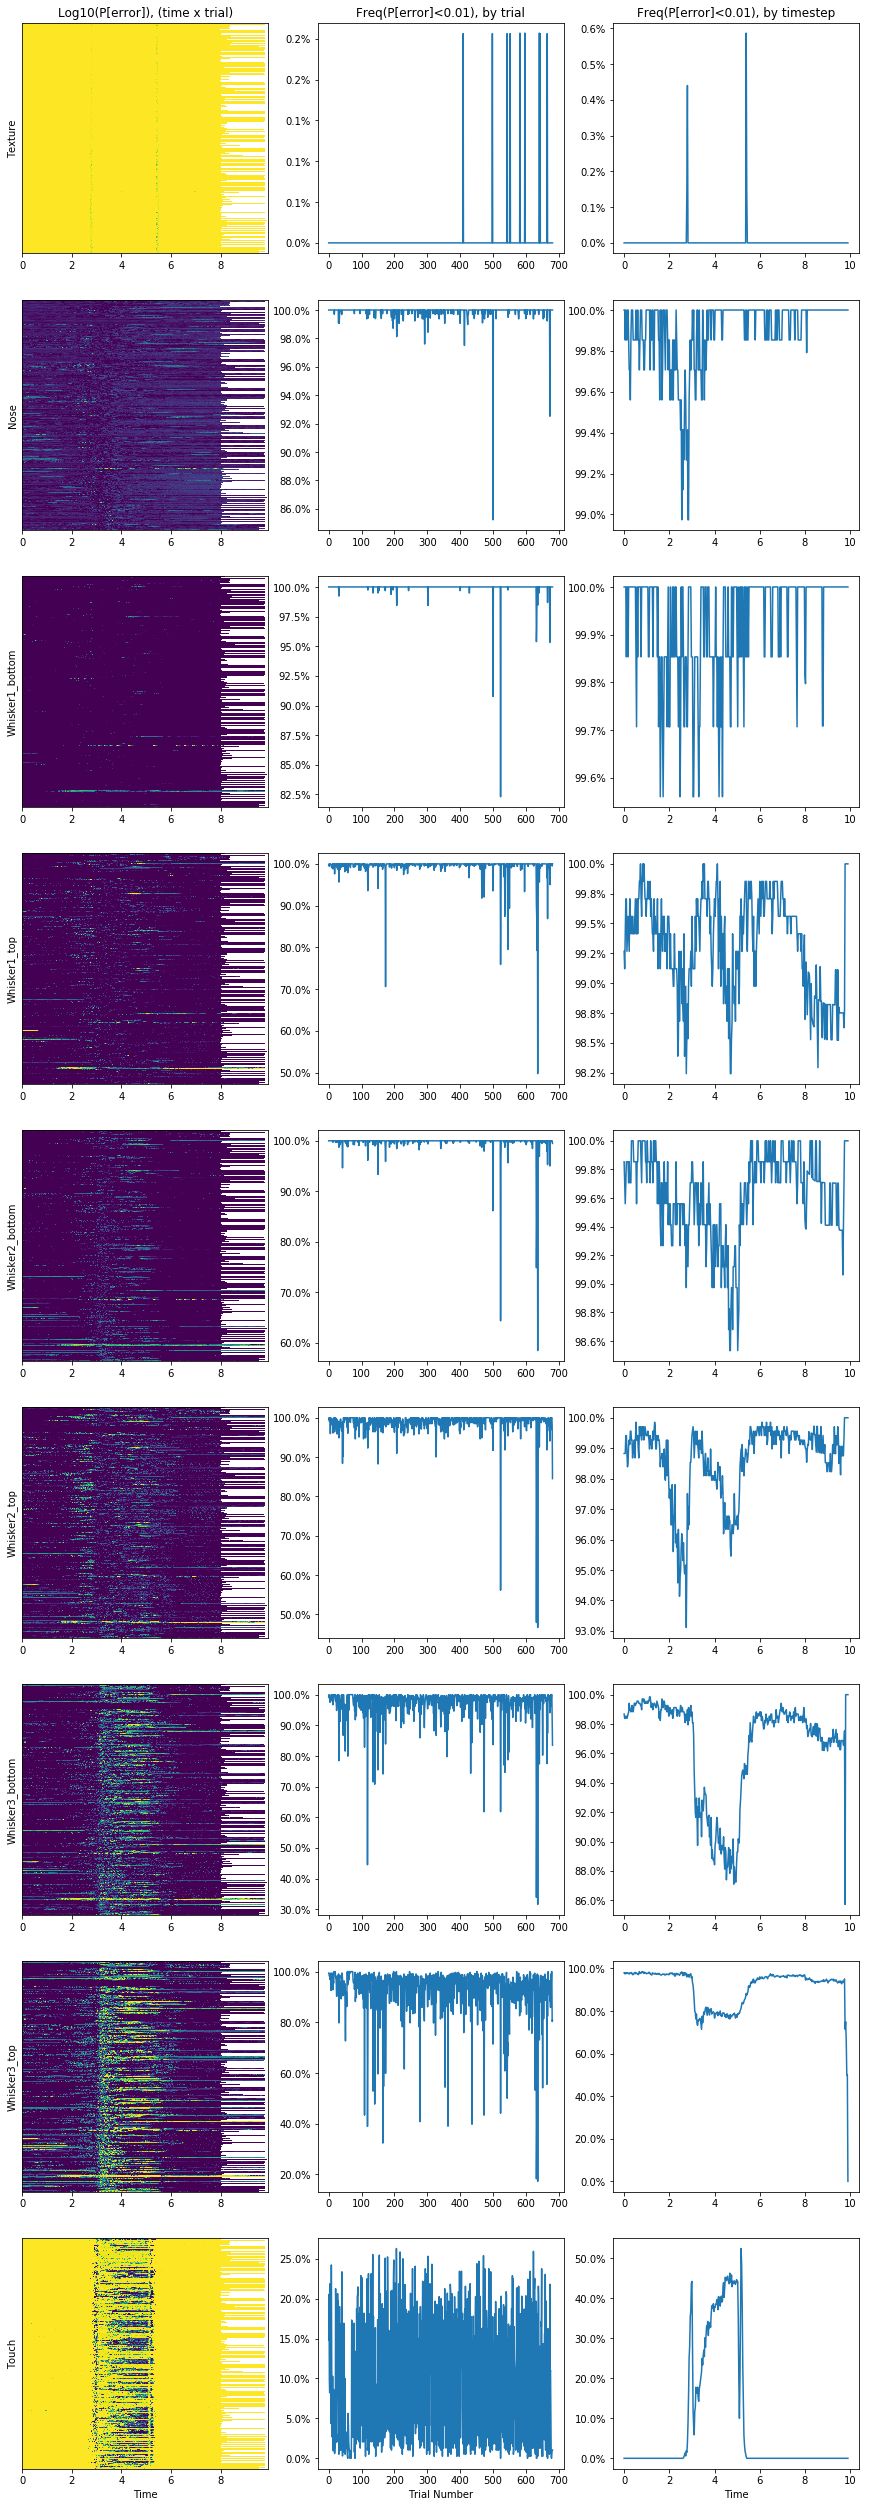

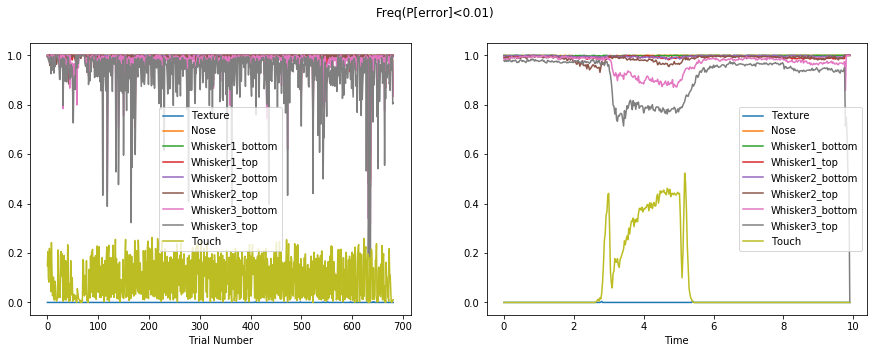

In [6]:
SP.display_quality_control(pThr=0.01)

## First Touch

**TODO**:
<font color='red' size='3'>
 <ul>
  <li>Decide if P=0.01 is a good measure of confidence for first touch</li>
  <li>Decide if first occurence of confident touch is an adequate measure of the first touch</li>
</ul> 
</font>

In [ ]:
SP.display_first_touch(pThr=0.01)

## Stickman

In [ ]:
for i in range(SP.nTrials):
    SP.write_stickman(trialIdx=i, showSummary=False)

(337, 9) (336, 9)
Skipping edge constraint as no edges provided
bool bool
(337, 9) (337, 9)
Not Found file 2017_11_20_10_29_15.avi
Found file 2017_11_20_10_29_15.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.55030325
 0.67424594 0.78855242 0.88888889]
Writing video [337/337]
Done writing!
Compressing to MP4
Deleting uncompressed
(326, 9) (325, 9)
Skipping edge constraint as no edges provided
bool bool
(326, 9) (326, 9)
Not Found file 2017_11_20_10_29_30.avi
Found file 2017_11_20_10_29_30.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.55030325
 0.67424594 0.78855242 0.88888889]
Writing video [326/326]
Done writing!
Compressing to MP4
Deleting uncompressed
(331, 9) (330, 9)
Skipping edge constraint as no edges provided
bool bool
(331, 9) (331, 9)
Not Found file 2017_11_20_10_29_48.avi
Found file 2017_11_20_10_29_48.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.55030325
 0.67424594 0.78855242 0.88888889]
Writing video [331/331]
Done writing!


Writing video [391/391]
Done writing!
Compressing to MP4
Deleting uncompressed
(328, 9) (327, 9)
Skipping edge constraint as no edges provided
bool bool
(328, 9) (328, 9)
Not Found file 2017_11_20_10_35_57.avi
Found file 2017_11_20_10_35_57.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.55030325
 0.67424594 0.78855242 0.88888889]
Writing video [328/328]
Done writing!
Compressing to MP4
Deleting uncompressed
(390, 9) (389, 9)
Skipping edge constraint as no edges provided
bool bool
(390, 9) (390, 9)
Not Found file 2017_11_20_10_36_15.avi
Found file 2017_11_20_10_36_15.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.55030325
 0.67424594 0.78855242 0.88888889]
Writing video [390/390]
Done writing!
Compressing to MP4
Deleting uncompressed
(320, 9) (319, 9)
Skipping edge constraint as no edges provided
bool bool
(320, 9) (320, 9)
Not Found file 2017_11_20_10_36_32.avi
Found file 2017_11_20_10_36_32.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.550

Writing video [325/325]
Done writing!
Compressing to MP4
Deleting uncompressed
(390, 9) (389, 9)
Skipping edge constraint as no edges provided
bool bool
(390, 9) (390, 9)
Not Found file 2017_11_20_10_42_37.avi
Found file 2017_11_20_10_42_37.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.55030325
 0.67424594 0.78855242 0.88888889]
Writing video [390/390]
Done writing!
Compressing to MP4
Deleting uncompressed
(319, 9) (318, 9)
Skipping edge constraint as no edges provided
bool bool
(319, 9) (319, 9)
Not Found file 2017_11_20_10_42_54.avi
Found file 2017_11_20_10_42_54.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.55030325
 0.67424594 0.78855242 0.88888889]
Writing video [319/319]
Done writing!
Compressing to MP4
Deleting uncompressed
(391, 9) (390, 9)
Skipping edge constraint as no edges provided
bool bool
(391, 9) (391, 9)
Not Found file 2017_11_20_10_43_09.avi
Found file 2017_11_20_10_43_09.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.550

Writing video [381/381]
Done writing!
Compressing to MP4
Deleting uncompressed
(381, 9) (380, 9)
Skipping edge constraint as no edges provided
bool bool
(381, 9) (381, 9)
Not Found file 2017_11_20_10_49_28.avi
Found file 2017_11_20_10_49_28.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.55030325
 0.67424594 0.78855242 0.88888889]
Writing video [381/381]
Done writing!
Compressing to MP4
Deleting uncompressed
(382, 9) (381, 9)
Skipping edge constraint as no edges provided
bool bool
(382, 9) (382, 9)
Not Found file 2017_11_20_10_49_44.avi
Found file 2017_11_20_10_49_44.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.55030325
 0.67424594 0.78855242 0.88888889]
Writing video [382/382]
Done writing!
Compressing to MP4
Deleting uncompressed
(320, 9) (319, 9)
Skipping edge constraint as no edges provided
bool bool
(320, 9) (320, 9)
Not Found file 2017_11_20_10_50_01.avi
Found file 2017_11_20_10_50_01.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.550

Writing video [391/391]
Done writing!
Compressing to MP4
Deleting uncompressed
(390, 9) (389, 9)
Skipping edge constraint as no edges provided
bool bool
(390, 9) (390, 9)
Not Found file 2017_11_20_10_56_05.avi
Found file 2017_11_20_10_56_05.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.55030325
 0.67424594 0.78855242 0.88888889]
Writing video [390/390]
Done writing!
Compressing to MP4
Deleting uncompressed
(321, 9) (320, 9)
Skipping edge constraint as no edges provided
bool bool
(321, 9) (321, 9)
Not Found file 2017_11_20_10_56_22.avi
Found file 2017_11_20_10_56_22.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.55030325
 0.67424594 0.78855242 0.88888889]
Writing video [321/321]
Done writing!
Compressing to MP4
Deleting uncompressed
(319, 9) (318, 9)
Skipping edge constraint as no edges provided
bool bool
(319, 9) (319, 9)
Not Found file 2017_11_20_10_56_38.avi
Found file 2017_11_20_10_56_38.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.550

Writing video [389/389]
Done writing!
Compressing to MP4
Deleting uncompressed
(350, 9) (349, 9)
Skipping edge constraint as no edges provided
bool bool
(350, 9) (350, 9)
Not Found file 2017_11_20_11_02_36.avi
Found file 2017_11_20_11_02_36.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.55030325
 0.67424594 0.78855242 0.88888889]
Writing video [350/350]
Done writing!
Compressing to MP4
Deleting uncompressed
(320, 9) (319, 9)
Skipping edge constraint as no edges provided
bool bool
(320, 9) (320, 9)
Not Found file 2017_11_20_11_02_53.avi
Found file 2017_11_20_11_02_53.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.55030325
 0.67424594 0.78855242 0.88888889]
Writing video [320/320]
Done writing!
Compressing to MP4
Deleting uncompressed
(390, 9) (389, 9)
Skipping edge constraint as no edges provided
bool bool
(390, 9) (390, 9)
Not Found file 2017_11_20_11_03_08.avi
Found file 2017_11_20_11_03_08.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.550

Writing video [391/391]
Done writing!
Compressing to MP4
Deleting uncompressed
(390, 9) (389, 9)
Skipping edge constraint as no edges provided
bool bool
(390, 9) (390, 9)
Not Found file 2017_11_20_11_09_12.avi
Found file 2017_11_20_11_09_12.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.55030325
 0.67424594 0.78855242 0.88888889]
Writing video [390/390]
Done writing!
Compressing to MP4
Deleting uncompressed
(324, 9) (323, 9)
Skipping edge constraint as no edges provided
bool bool
(324, 9) (324, 9)
Not Found file 2017_11_20_11_09_29.avi
Found file 2017_11_20_11_09_29.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.55030325
 0.67424594 0.78855242 0.88888889]
Writing video [324/324]
Done writing!
Compressing to MP4
Deleting uncompressed
(390, 9) (389, 9)
Skipping edge constraint as no edges provided
bool bool
(390, 9) (390, 9)
Not Found file 2017_11_20_11_09_45.avi
Found file 2017_11_20_11_09_45.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.550

Writing video [397/397]
Done writing!
Compressing to MP4
Deleting uncompressed
(336, 9) (335, 9)
Skipping edge constraint as no edges provided
bool bool
(336, 9) (336, 9)
Not Found file 2017_11_20_11_15_49.avi
Found file 2017_11_20_11_15_49.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.55030325
 0.67424594 0.78855242 0.88888889]
Writing video [336/336]
Done writing!
Compressing to MP4
Deleting uncompressed
(332, 9) (331, 9)
Skipping edge constraint as no edges provided
bool bool
(332, 9) (332, 9)
Not Found file 2017_11_20_11_16_04.avi
Found file 2017_11_20_11_16_04.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.55030325
 0.67424594 0.78855242 0.88888889]
Writing video [332/332]
Done writing!
Compressing to MP4
Deleting uncompressed
(390, 9) (389, 9)
Skipping edge constraint as no edges provided
bool bool
(390, 9) (390, 9)
Not Found file 2017_11_20_11_16_22.avi
Found file 2017_11_20_11_16_22.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.550

Writing video [390/390]
Done writing!
Compressing to MP4
Deleting uncompressed
(325, 9) (324, 9)
Skipping edge constraint as no edges provided
bool bool
(325, 9) (325, 9)
Not Found file 2017_11_20_11_22_21.avi
Found file 2017_11_20_11_22_21.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.55030325
 0.67424594 0.78855242 0.88888889]
Writing video [325/325]
Done writing!
Compressing to MP4
Deleting uncompressed
(328, 9) (327, 9)
Skipping edge constraint as no edges provided
bool bool
(328, 9) (328, 9)
Not Found file 2017_11_20_11_22_38.avi
Found file 2017_11_20_11_22_38.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.55030325
 0.67424594 0.78855242 0.88888889]
Writing video [328/328]
Done writing!
Compressing to MP4
Deleting uncompressed
(390, 9) (389, 9)
Skipping edge constraint as no edges provided
bool bool
(390, 9) (390, 9)
Not Found file 2017_11_20_11_22_54.avi
Found file 2017_11_20_11_22_54.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.550

Writing video [390/390]
Done writing!
Compressing to MP4
Deleting uncompressed
(389, 9) (388, 9)
Skipping edge constraint as no edges provided
bool bool
(389, 9) (389, 9)
Not Found file 2017_11_20_11_28_55.avi
Found file 2017_11_20_11_28_55.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.55030325
 0.67424594 0.78855242 0.88888889]
Writing video [389/389]
Done writing!
Compressing to MP4
Deleting uncompressed
(321, 9) (320, 9)
Skipping edge constraint as no edges provided
bool bool
(321, 9) (321, 9)
Not Found file 2017_11_20_11_29_12.avi
Found file 2017_11_20_11_29_12.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.55030325
 0.67424594 0.78855242 0.88888889]
Writing video [321/321]
Done writing!
Compressing to MP4
Deleting uncompressed
(328, 9) (327, 9)
Skipping edge constraint as no edges provided
bool bool
(328, 9) (328, 9)
Not Found file 2017_11_20_11_29_27.avi
Found file 2017_11_20_11_29_27.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.550

Writing video [391/391]
Done writing!
Compressing to MP4
Deleting uncompressed
(390, 9) (389, 9)
Skipping edge constraint as no edges provided
bool bool
(390, 9) (390, 9)
Not Found file 2017_11_20_11_35_28.avi
Found file 2017_11_20_11_35_28.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.55030325
 0.67424594 0.78855242 0.88888889]
Writing video [390/390]
Done writing!
Compressing to MP4
Deleting uncompressed
(320, 9) (319, 9)
Skipping edge constraint as no edges provided
bool bool
(320, 9) (320, 9)
Not Found file 2017_11_20_11_35_45.avi
Found file 2017_11_20_11_35_45.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.55030325
 0.67424594 0.78855242 0.88888889]
Writing video [320/320]
Done writing!
Compressing to MP4
Deleting uncompressed
(390, 9) (389, 9)
Skipping edge constraint as no edges provided
bool bool
(390, 9) (390, 9)
Not Found file 2017_11_20_11_36_01.avi
Found file 2017_11_20_11_36_01.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.550

Writing video [320/320]
Done writing!
Compressing to MP4
Deleting uncompressed
(390, 9) (389, 9)
Skipping edge constraint as no edges provided
bool bool
(390, 9) (390, 9)
Not Found file 2017_11_20_11_42_01.avi
Found file 2017_11_20_11_42_01.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.55030325
 0.67424594 0.78855242 0.88888889]
Writing video [390/390]
Done writing!
Compressing to MP4
Deleting uncompressed
(320, 9) (319, 9)
Skipping edge constraint as no edges provided
bool bool
(320, 9) (320, 9)
Not Found file 2017_11_20_11_42_18.avi
Found file 2017_11_20_11_42_18.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.55030325
 0.67424594 0.78855242 0.88888889]
Writing video [320/320]
Done writing!
Compressing to MP4
Deleting uncompressed
(320, 9) (319, 9)
Skipping edge constraint as no edges provided
bool bool
(320, 9) (320, 9)
Not Found file 2017_11_20_11_42_33.avi
Found file 2017_11_20_11_42_33.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.550

Writing video [390/390]
Done writing!
Compressing to MP4
Deleting uncompressed
(323, 9) (322, 9)
Skipping edge constraint as no edges provided
bool bool
(323, 9) (323, 9)
Not Found file 2017_11_20_11_48_32.avi
Found file 2017_11_20_11_48_32.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.55030325
 0.67424594 0.78855242 0.88888889]
Writing video [323/323]
Done writing!
Compressing to MP4
Deleting uncompressed
(320, 9) (319, 9)
Skipping edge constraint as no edges provided
bool bool
(320, 9) (320, 9)
Not Found file 2017_11_20_11_48_48.avi
Found file 2017_11_20_11_48_48.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.55030325
 0.67424594 0.78855242 0.88888889]
Writing video [320/320]
Done writing!
Compressing to MP4
Deleting uncompressed
(391, 9) (390, 9)
Skipping edge constraint as no edges provided
bool bool
(391, 9) (391, 9)
Not Found file 2017_11_20_11_49_03.avi
Found file 2017_11_20_11_49_03.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.550

Writing video [325/325]
Done writing!
Compressing to MP4
Deleting uncompressed
(333, 9) (332, 9)
Skipping edge constraint as no edges provided
bool bool
(333, 9) (333, 9)
Not Found file 2017_11_20_11_55_02.avi
Found file 2017_11_20_11_55_02.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.55030325
 0.67424594 0.78855242 0.88888889]
Writing video [333/333]
Done writing!
Compressing to MP4
Deleting uncompressed
(390, 9) (389, 9)
Skipping edge constraint as no edges provided
bool bool
(390, 9) (390, 9)
Not Found file 2017_11_20_11_55_18.avi
Found file 2017_11_20_11_55_18.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.55030325
 0.67424594 0.78855242 0.88888889]
Writing video [390/390]
Done writing!
Compressing to MP4
Deleting uncompressed
(329, 9) (328, 9)
Skipping edge constraint as no edges provided
bool bool
(329, 9) (329, 9)
Not Found file 2017_11_20_11_55_35.avi
Found file 2017_11_20_11_55_35.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.550

Writing video [390/390]
Done writing!
Compressing to MP4
Deleting uncompressed
(321, 9) (320, 9)
Skipping edge constraint as no edges provided
bool bool
(321, 9) (321, 9)
Not Found file 2017_11_20_12_01_36.avi
Found file 2017_11_20_12_01_36.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.55030325
 0.67424594 0.78855242 0.88888889]
Writing video [321/321]
Done writing!
Compressing to MP4
Deleting uncompressed
(391, 9) (390, 9)
Skipping edge constraint as no edges provided
bool bool
(391, 9) (391, 9)
Not Found file 2017_11_20_12_01_51.avi
Found file 2017_11_20_12_01_51.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.55030325
 0.67424594 0.78855242 0.88888889]
Writing video [391/391]
Done writing!
Compressing to MP4
Deleting uncompressed
(390, 9) (389, 9)
Skipping edge constraint as no edges provided
bool bool
(390, 9) (390, 9)
Not Found file 2017_11_20_12_02_08.avi
Found file 2017_11_20_12_02_08.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.550

Writing video [390/390]
Done writing!
Compressing to MP4
Deleting uncompressed
(390, 9) (389, 9)
Skipping edge constraint as no edges provided
bool bool
(390, 9) (390, 9)
Not Found file 2017_11_20_12_08_08.avi
Found file 2017_11_20_12_08_08.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.55030325
 0.67424594 0.78855242 0.88888889]
Writing video [390/390]
Done writing!
Compressing to MP4
Deleting uncompressed
(319, 9) (318, 9)
Skipping edge constraint as no edges provided
bool bool
(319, 9) (319, 9)
Not Found file 2017_11_20_12_08_25.avi
Found file 2017_11_20_12_08_25.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.55030325
 0.67424594 0.78855242 0.88888889]
Writing video [319/319]
Done writing!
Compressing to MP4
Deleting uncompressed
(391, 9) (390, 9)
Skipping edge constraint as no edges provided
bool bool
(391, 9) (391, 9)
Not Found file 2017_11_20_12_08_41.avi
Found file 2017_11_20_12_08_41.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.550

Writing video [321/321]
Done writing!
Compressing to MP4
Deleting uncompressed
(325, 9) (324, 9)
Skipping edge constraint as no edges provided
bool bool
(325, 9) (325, 9)
Not Found file 2017_11_20_12_14_41.avi
Found file 2017_11_20_12_14_41.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.55030325
 0.67424594 0.78855242 0.88888889]
Writing video [325/325]
Done writing!
Compressing to MP4
Deleting uncompressed
(326, 9) (325, 9)
Skipping edge constraint as no edges provided
bool bool
(326, 9) (326, 9)
Not Found file 2017_11_20_12_14_57.avi
Found file 2017_11_20_12_14_57.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.55030325
 0.67424594 0.78855242 0.88888889]
Writing video [326/326]
Done writing!
Compressing to MP4
Deleting uncompressed
(324, 9) (323, 9)
Skipping edge constraint as no edges provided
bool bool
(324, 9) (324, 9)
Not Found file 2017_11_20_12_15_14.avi
Found file 2017_11_20_12_15_14.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.550

Writing video [325/325]
Done writing!
Compressing to MP4
Deleting uncompressed
(391, 9) (390, 9)
Skipping edge constraint as no edges provided
bool bool
(391, 9) (391, 9)
Not Found file 2017_11_20_12_21_12.avi
Found file 2017_11_20_12_21_12.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.55030325
 0.67424594 0.78855242 0.88888889]
Writing video [391/391]
Done writing!
Compressing to MP4
Deleting uncompressed
(390, 9) (389, 9)
Skipping edge constraint as no edges provided
bool bool
(390, 9) (390, 9)
Not Found file 2017_11_20_12_21_29.avi
Found file 2017_11_20_12_21_29.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.55030325
 0.67424594 0.78855242 0.88888889]
Writing video [390/390]
Done writing!
Compressing to MP4
Deleting uncompressed
(320, 9) (319, 9)
Skipping edge constraint as no edges provided
bool bool
(320, 9) (320, 9)
Not Found file 2017_11_20_12_21_46.avi
Found file 2017_11_20_12_21_46.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.550

Writing video [390/390]
Done writing!
Compressing to MP4
Deleting uncompressed
(390, 9) (389, 9)
Skipping edge constraint as no edges provided
bool bool
(390, 9) (390, 9)
Not Found file 2017_11_20_12_27_42.avi
Found file 2017_11_20_12_27_42.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.55030325
 0.67424594 0.78855242 0.88888889]
Writing video [390/390]
Done writing!
Compressing to MP4
Deleting uncompressed
(321, 9) (320, 9)
Skipping edge constraint as no edges provided
bool bool
(321, 9) (321, 9)
Not Found file 2017_11_20_12_27_59.avi
Found file 2017_11_20_12_27_59.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.55030325
 0.67424594 0.78855242 0.88888889]
Writing video [321/321]
Done writing!
Compressing to MP4
Deleting uncompressed
(320, 9) (319, 9)
Skipping edge constraint as no edges provided
bool bool
(320, 9) (320, 9)
Not Found file 2017_11_20_12_28_14.avi
Found file 2017_11_20_12_28_14.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.550

Writing video [390/390]
Done writing!
Compressing to MP4
Deleting uncompressed
(389, 9) (388, 9)
Skipping edge constraint as no edges provided
bool bool
(389, 9) (389, 9)
Not Found file 2017_11_20_12_34_13.avi
Found file 2017_11_20_12_34_13.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.55030325
 0.67424594 0.78855242 0.88888889]
Writing video [389/389]
Done writing!
Compressing to MP4
Deleting uncompressed
(320, 9) (319, 9)
Skipping edge constraint as no edges provided
bool bool
(320, 9) (320, 9)
Not Found file 2017_11_20_12_34_30.avi
Found file 2017_11_20_12_34_30.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.55030325
 0.67424594 0.78855242 0.88888889]
Writing video [320/320]
Done writing!
Compressing to MP4
Deleting uncompressed
(390, 9) (389, 9)
Skipping edge constraint as no edges provided
bool bool
(390, 9) (390, 9)
Not Found file 2017_11_20_12_34_45.avi
Found file 2017_11_20_12_34_45.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.550

Writing video [390/390]
Done writing!
Compressing to MP4
Deleting uncompressed
(324, 9) (323, 9)
Skipping edge constraint as no edges provided
bool bool
(324, 9) (324, 9)
Not Found file 2017_11_20_12_40_45.avi
Found file 2017_11_20_12_40_45.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.55030325
 0.67424594 0.78855242 0.88888889]
Writing video [324/324]
Done writing!
Compressing to MP4
Deleting uncompressed
(320, 9) (319, 9)
Skipping edge constraint as no edges provided
bool bool
(320, 9) (320, 9)
Not Found file 2017_11_20_12_41_01.avi
Found file 2017_11_20_12_41_01.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.55030325
 0.67424594 0.78855242 0.88888889]
Writing video [320/320]
Done writing!
Compressing to MP4
Deleting uncompressed
(390, 9) (389, 9)
Skipping edge constraint as no edges provided
bool bool
(390, 9) (390, 9)
Not Found file 2017_11_20_12_41_16.avi
Found file 2017_11_20_12_41_16.mp4
[0.         0.08432407 0.18466054 0.29896702 0.42290972 0.550

Writing video [348/348]
Done writing!
Compressing to MP4


682